## 期末課題

In [ ]:
# Webサイトのクローリング用ライブラリのインストール
!pip install icrawler

  Using cached icrawler-0.6.4.tar.gz (26 kB)
  Created wheel for icrawler: filename=icrawler-0.6.4-py2.py3-none-any.whl size=35063 sha256=eed93eb06ce77d3c5680bbba6f1abb2aa60eb69be940e6e6812e635eab9a509b
  Stored in directory: /root/.cache/pip/wheels/34/9a/e6/a8bc00ac61ff1f0e613af0d181feaef49ed226915ee7ff19d1
Successfully built icrawler


In [ ]:
from icrawler.builtin import BingImageCrawler

#### ダウンロード（クローリング）の実行

In [ ]:
# ダウンロード場所の設定
crawler = BingImageCrawler(storage={"root_dir":"dog"})

# オプションの設定
filters = dict(color='color')

In [ ]:
# ディレクトリに画像をダウンロード
crawler.crawl(keyword="dog", filters=filters, max_num=1000)

# 同様にcatの画像をcatディレクトリにダウンロード
crawler = BingImageCrawler(storage={"root_dir":"cat"})
filters = dict(color='color')
crawler.crawl(keyword="cat", filters=filters, max_num=1000)

2021-07-28 02:05:04,623 - INFO - icrawler.crawler - start crawling...
2021-07-28 02:05:04,624 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-07-28 02:05:04,640 - INFO - icrawler.crawler - starting 1 parser threads...
2021-07-28 02:05:04,643 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-07-28 02:05:04,916 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dog&first=0&qft=+filterui:color2-color
2021-07-28 02:05:05,492 - INFO - downloader - image #1	https://www.thefarmersdog.com/digest/wp-content/uploads/2020/05/Ears-pitbull-2-scaled.jpg
2021-07-28 02:05:05,577 - INFO - downloader - image #2	http://www.panaynews.net/wp-content/uploads/2020/09/NewGuineaSingingDogs_CNN.jpg
2021-07-28 02:05:06,041 - INFO - downloader - image #3	https://usercontent2.hubstatic.com/13892235_f1024.jpg
2021-07-28 02:05:06,132 - INFO - downloader - image #4	https://www.breedyourdog.com/uploads/listing_images/23557/61123/big_IMG_1316.jpg
2021-07-28 02:05:06,

#### ダウンロードした画像の表示

In [ ]:
# dogが入っているディレクトリから画像ファイルのリストを取得し、20枚を並べて表示してみる
from os import listdir
import matplotlib.pyplot as plt
import cv2

path = "/content/dog/"
imagesList = listdir(path)
print(imagesList)

fig=plt.figure(figsize=(20,20))
columns = 5
rows = 4

['000306.jpg', '000152.jpg', '000033.jpg', '000411.jpg', '000400.jpg', '000160.jpg', '000282.jpg', '000562.jpg', '000035.jpg', '000401.jpg', '000450.jpg', '000508.jpg', '000415.jpg', '000071.jpg', '000413.jpg', '000195.jpg', '000421.jpg', '000603.jpg', '000398.jpg', '000574.jpg', '000466.jpg', '000022.jpg', '000082.jpg', '000049.jpg', '000376.jpg', '000112.jpg', '000196.jpg', '000169.jpg', '000431.jpg', '000473.jpg', '000248.jpg', '000007.jpg', '000386.jpg', '000393.jpg', '000258.jpg', '000014.jpg', '000285.jpg', '000134.jpg', '000498.jpg', '000601.jpg', '000262.jpg', '000437.jpg', '000572.jpg', '000099.jpg', '000166.jpg', '000620.jpg', '000179.jpg', '000395.jpg', '000270.jpg', '000040.jpg', '000096.jpg', '000475.jpg', '000575.jpg', '000238.jpg', '000163.jpg', '000528.jpg', '000202.jpg', '000561.jpg', '000433.jpg', '000459.jpg', '000425.jpg', '000323.jpg', '000104.jpg', '000585.jpg', '000064.jpg', '000317.jpg', '000410.jpg', '000027.jpg', '000144.jpg', '000499.jpg', '000359.jpg', '0002

<Figure size 1440x1440 with 0 Axes>

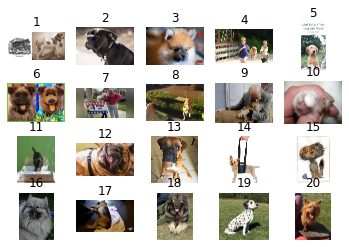

In [ ]:
# dogが入っているディレクトリから画像ファイルのリストを取得し、20枚を並べて表示してみる
i=1
for file in imagesList:
    img_bgr= cv2.imread(path+file)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, columns, i)
    plt.title(i)
    plt.imshow(img_rgb)
    plt.axis('off')
    if i<20:
      i=i+1
    else:
      break
plt.show()

#### データの設定

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from os import listdir
import numpy as np

In [ ]:
# クラスラベルをリストとして設定
classes = ["dog", "cat"]

# リスト長から総クラス数の取得
num_classes = len(classes)

# 各クラスの画像から評価に使うデータ数を設定
num_testdata = 50

# 各データ格納用の空リストの準備
X_train, X_test, y_train, y_test = [], [], [], []

In [ ]:
# クラスラベルをリストとして設定
for index, label in enumerate(classes):
    path = "/content/" + label + "/"
    imagesList = listdir(path)

    for i, img in enumerate(imagesList):

        img = img.strip()
        img = path + img
        temp_img = load_img(img, grayscale=False, target_size=(256,256))
        temp_img_array = img_to_array(temp_img) / 255

        if i < num_testdata:
            X_test.append(temp_img_array)
            y_test.append(index)
        else:
            X_train.append(temp_img_array)
            y_train.append(index)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


In [ ]:
# 各データをnumpy.array形式に変換
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

# 各データの形式・サイズの確認
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1105, 256, 256, 3)
(100, 256, 256, 3)
(1105,)
(100,)


#### クラスラベルの変換

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(1105, 2)
(100, 2)


#### ネットワーク構築の準備

In [ ]:
from tensorflow.keras import layers
from tensorflow. keras import models

model1 = models.Sequential()
# # 前章を参考に以下を自分でコーディング
# インスタンス名が model1 であることに注意

# Conv層：　フィルタ数：32、フィルタサイズ：3×3、ReLU 入力画像サイズ：256×256×3チャネル
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：64、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# テンソルのフラット化
# Dense層：　ユニット数：512、ReLU
# 出力層（Dense層）：　ユニット数：num_classes、softmax

# ==================================================================
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [ ]:
# ネットワークの構造の確認
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

#### モデルのコンパイル


In [ ]:
from tensorflow.keras import optimizers
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### 学習の実行・モデルの保存


In [ ]:
# まず、batch size:5、エポック数:20で学習してみる（かなり適当な値）
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_test, y_test))

# 以下でモデルの保存が可能
model1.save('cats_and_dogs_1.h5')

Epoch 1/20
221/221 [==============================] - 37s 37ms/step - loss: 0.6975 - acc: 0.5122 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 2/20
221/221 [==============================] - 8s 37ms/step - loss: 0.6897 - acc: 0.5294 - val_loss: 0.6877 - val_acc: 0.5900
Epoch 3/20
221/221 [==============================] - 8s 36ms/step - loss: 0.6746 - acc: 0.5891 - val_loss: 0.6644 - val_acc: 0.6000
Epoch 4/20
221/221 [==============================] - 8s 37ms/step - loss: 0.6255 - acc: 0.6534 - val_loss: 0.6724 - val_acc: 0.6000
Epoch 5/20
221/221 [==============================] - 8s 37ms/step - loss: 0.5450 - acc: 0.7140 - val_loss: 0.6785 - val_acc: 0.6400
Epoch 6/20
221/221 [==============================] - 8s 36ms/step - loss: 0.4665 - acc: 0.7855 - val_loss: 0.6947 - val_acc: 0.5900
Epoch 7/20
221/221 [==============================] - 8s 36ms/step - loss: 0.3840 - acc: 0.8281 - val_loss: 0.7652 - val_acc: 0.5800
Epoch 8/20
221/221 [==============================] - 8s 36ms/step -

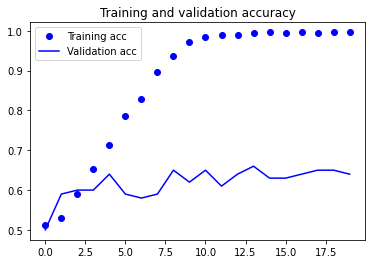

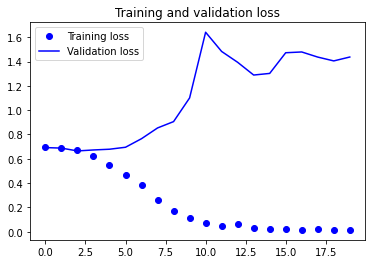

In [ ]:
# 学習時の損失と認識精度のプロット
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### この結果から何が言えるか？
***
- traningのデータは学習が進むごとにAccuracyが向上し、epochsが７以上ではtraining accは0.9以上になっているのに対してvalidationのデータはepochsが3まではvalidation accが向上していたが、それ以降はおよそ0.55付近の値となった。
- trainingのデータは学習が進むごとにlossが減少し、epochsが8以上ではtraining lossはおよそ0.0ほどになっているのに対してvalidationのデータはepochsが３まではvalidation accあまり変化がなかったもののそれ以降は増加し、epochsが18の時にはおよそ3.5付近の値となった。
- これらの結果から、今回の学習ではtrainingのデータのaccuracyは向上したもののvalidationのデータのaccuracyは向上しなかったことからtrainingデータに過学習していると考えられる。

#### Generatorの設定

In [ ]:
# ライブラリのimport
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generatorのインスタンスの生成
train_datagen = ImageDataGenerator()
gen = train_datagen.flow(X_train, batch_size=5, shuffle=False)

#### 画像の確認

(5, 256, 256, 3)


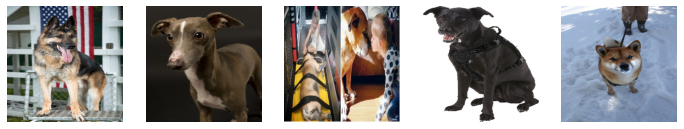

In [ ]:
batches = gen.next()
print(batches.shape)
from tensorflow.keras.preprocessing.image import array_to_img
fig = plt.figure(figsize=(12, 5))
for i in range(len(batches)):
    gen_img = array_to_img(batches[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()

#### Data Augmentationの実行

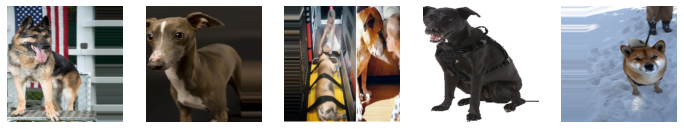

In [ ]:
# 確認用
train_datagen2 = ImageDataGenerator(width_shift_range=0.3)
gen2 = train_datagen2.flow(X_train, batch_size=5, shuffle=False)
batches = gen2.next()

fig = plt.figure(figsize=(12, 5))
for i in range(len(batches)):
    gen_img = array_to_img(batches[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()

#### 学習及び評価用のGeneratorの設定・生成


In [ ]:
# 実験用
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=5)
val_generator = val_datagen.flow(X_test, y_test, batch_size=5, shuffle=False)

#### 再度、ネットワークの構築

In [ ]:
# model2で構築

# Conv層：　フィルタ数：32、フィルタサイズ：3×3、ReLU 入力画像サイズ：256×256×3チャネル
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：64、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# テンソルのフラット化
# Dense層：　ユニット数：512、ReLU
# 出力層（Dense層）：　ユニット数：num_classes、softmax

# ==================================================================
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

#### コンパイル・学習・保存

In [ ]:
# 同じ設定でコンパイル
model2.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history2としてログを記録）
history2 = model2.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=20, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model2.save('cats_and_dogs_2.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
221/221 [==============================] - 22s 97ms/step - loss: 0.6977 - acc: 0.5050 - val_loss: 0.6923 - val_acc: 0.5600
Epoch 2/20
221/221 [==============================] - 21s 95ms/step - loss: 0.6935 - acc: 0.5050 - val_loss: 0.6917 - val_acc: 0.5200
Epoch 3/20
221/221 [==============================] - 21s 93ms/step - loss: 0.6872 - acc: 0.5412 - val_loss: 0.6947 - val_acc: 0.5000
Epoch 4/20
221/221 [==============================] - 21s 96ms/step - loss: 0.6933 - acc: 0.5213 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 5/20
221/221 [==============================] - 21s 93ms/step - loss: 0.6943 - acc: 0.5023 - val_loss: 0.6926 - val_acc: 0.5400
Epoch 6/20
221/221 [==============================] - 21s 96ms/step - loss: 0.6926 - acc: 0.5321 - val_loss: 0.6889 - val_acc: 0.6000
Epoch 7/20
221/221 [==============================] - 21s 94ms/step - loss: 0.6789 - acc: 0.5502 - val_loss: 0.6676 - val_acc: 0.6100
Epoch 8/20
221/221 [==============================] - 21s 95ms

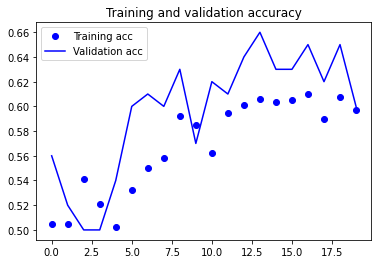

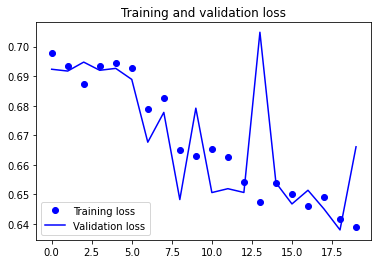

In [ ]:
# 認識率と誤差をプロット
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 学習の継続


In [ ]:
# 引き続き学習を続けてみる
history2 = model2.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=50, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model2.save('cats_and_dogs_2_2.h5')

Epoch 1/50
221/221 [==============================] - 21s 96ms/step - loss: 0.6428 - acc: 0.6118 - val_loss: 0.6286 - val_acc: 0.6600
Epoch 2/50
221/221 [==============================] - 21s 94ms/step - loss: 0.6302 - acc: 0.6308 - val_loss: 0.6236 - val_acc: 0.6600
Epoch 3/50
221/221 [==============================] - 21s 95ms/step - loss: 0.6277 - acc: 0.6407 - val_loss: 0.6384 - val_acc: 0.6600
Epoch 4/50
221/221 [==============================] - 21s 94ms/step - loss: 0.6184 - acc: 0.6425 - val_loss: 0.6296 - val_acc: 0.6700
Epoch 5/50
221/221 [==============================] - 21s 95ms/step - loss: 0.6141 - acc: 0.6552 - val_loss: 0.6200 - val_acc: 0.6500
Epoch 6/50
221/221 [==============================] - 21s 94ms/step - loss: 0.6215 - acc: 0.6452 - val_loss: 0.6883 - val_acc: 0.5800
Epoch 7/50
221/221 [==============================] - 21s 95ms/step - loss: 0.6161 - acc: 0.6299 - val_loss: 0.7054 - val_acc: 0.6000
Epoch 8/50
221/221 [==============================] - 21s 94ms

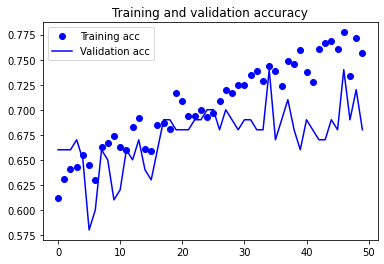

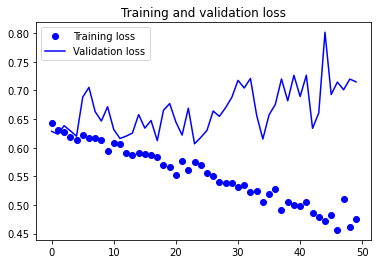

In [ ]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 再度、ネットワークの構築


In [ ]:
# model3で構築

# Conv層：　フィルタ数：32、フィルタサイズ：3×3、ReLU 入力画像サイズ：256×256×3チャネル
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：64、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# テンソルのフラット化
# model3.add(layers.Dropout(0.5))
# Dense層：　ユニット数：512、ReLU
# 出力層（Dense層）：　ユニット数：num_classes、softmax

# ==================================================================
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

#### コンパイル・学習・保存


In [ ]:
# 同じ設定でコンパイル
model3.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history3としてログを記録）
history3 = model3.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model3.save('cats_and_dogs_3.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
221/221 [==============================] - 22s 97ms/step - loss: 0.7012 - acc: 0.5186 - val_loss: 0.6904 - val_acc: 0.5200
Epoch 2/100
221/221 [==============================] - 21s 94ms/step - loss: 0.6931 - acc: 0.5231 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 3/100
221/221 [==============================] - 21s 97ms/step - loss: 0.6886 - acc: 0.5095 - val_loss: 0.6677 - val_acc: 0.6200
Epoch 4/100
221/221 [==============================] - 21s 95ms/step - loss: 0.6889 - acc: 0.5367 - val_loss: 0.6660 - val_acc: 0.6300
Epoch 5/100
221/221 [==============================] - 21s 94ms/step - loss: 0.6775 - acc: 0.5828 - val_loss: 0.6815 - val_acc: 0.5200
Epoch 6/100
221/221 [==============================] - 21s 93ms/step - loss: 0.6747 - acc: 0.5665 - val_loss: 0.6583 - val_acc: 0.6000
Epoch 7/100
221/221 [==============================] - 21s 96ms/step - loss: 0.6722 - acc: 0.5638 - val_loss: 0.6597 - val_acc: 0.5900
Epoch 8/100
221/221 [==============================] - 

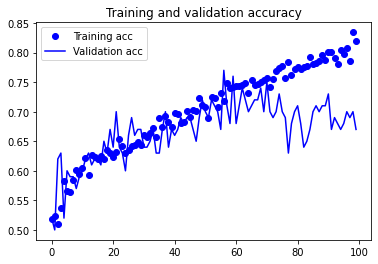

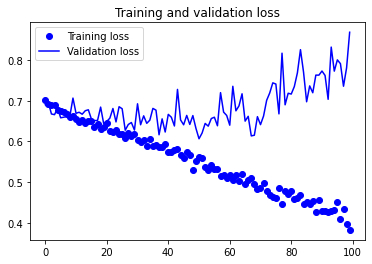

In [ ]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs = range(len(acc3))

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 最終的なテストデータの認識率


In [ ]:
test_loss, test_acc = model3.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 15ms/step - loss: 0.8688 - acc: 0.6700
test acc 0.6700000166893005


#### Data Augmentation＋Dropoutの効果

各手法の適用なしの場合と比べ、結果はどう変化したか？

***
- model2の学習による推移に比べて今回の学習ではepochs数を100回まで増やして学習を行った。trainingデータについて、学習回数を重ねるにつれて認識精度は向上したが最終的な認識精度、損失の値は大差なかった。
- その一方でvalidationデータについて学習回数を重ねるにつれて認識精度は向上し、損失はepochs数50回までは緩やかに減少していたが、それ以降は増加していった。
- model2と同様に振動をしていた。
- これらの結果からmodel2と比べmodel3はvalidationデータに対する認識精度は少し良くなったものの、損失は回数を重ねると増加した。

### 更なる改善
- 以下のパラメータを可能な範囲でチューニングし、認識率を更に向上できるように試行錯誤し報告
  - モデルのインスタンス名は設定毎に別にすること

- Conv層のフィルタ数
- Conv層（及びPooling層）の数
- Dense層のユニット数
- Dropoutの挿入位置・確率
- Epoch数
- 学習率


In [ ]:
# model4で構築
# ==================================================================
model4 = models.Sequential()

model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.8))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [ ]:
# 同じ設定でコンパイル
model4.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history4としてログを記録）
history4 = model4.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model4.save('cats_and_dogs_4.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
221/221 [==============================] - 22s 96ms/step - loss: 0.6970 - acc: 0.5249 - val_loss: 0.6855 - val_acc: 0.5900
Epoch 2/100
221/221 [==============================] - 21s 94ms/step - loss: 0.6925 - acc: 0.5249 - val_loss: 0.6830 - val_acc: 0.5600
Epoch 3/100
221/221 [==============================] - 21s 93ms/step - loss: 0.6811 - acc: 0.5376 - val_loss: 0.6927 - val_acc: 0.6100
Epoch 4/100
221/221 [==============================] - 21s 93ms/step - loss: 0.6805 - acc: 0.5683 - val_loss: 0.6736 - val_acc: 0.6200
Epoch 5/100
221/221 [==============================] - 21s 93ms/step - loss: 0.6703 - acc: 0.5801 - val_loss: 0.6545 - val_acc: 0.6400
Epoch 6/100
221/221 [==============================] - 21s 93ms/step - loss: 0.6781 - acc: 0.5701 - val_loss: 0.6660 - val_acc: 0.6000
Epoch 7/100
221/221 [==============================] - 21s 93ms/step - loss: 0.6687 - acc: 0.5602 - val_loss: 0.6666 - val_acc: 0.5800
Epoch 8/100
221/221 [==============================] - 

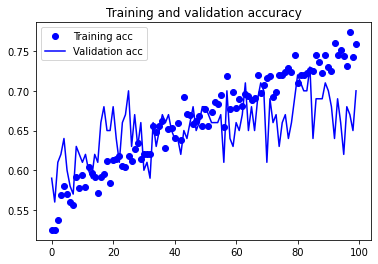

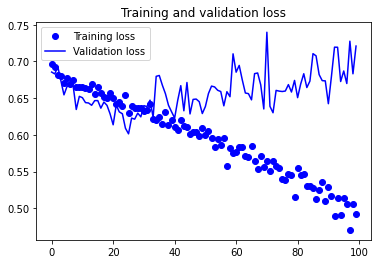

In [ ]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs = range(len(acc4))

plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss4, 'bo', label='Training loss')
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model4.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 13ms/step - loss: 0.7209 - acc: 0.7000
test acc 0.699999988079071


In [ ]:
# model5で構築
# ==================================================================
model5 = models.Sequential()

model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dropout(0.2))
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [ ]:
# 同じ設定でコンパイル
model5.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history4としてログを記録）
history5 = model5.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model5.save('cats_and_dogs_5.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
221/221 [==============================] - 22s 94ms/step - loss: 0.6960 - acc: 0.5014 - val_loss: 0.6894 - val_acc: 0.6000
Epoch 2/100
221/221 [==============================] - 20s 92ms/step - loss: 0.6856 - acc: 0.5385 - val_loss: 0.6676 - val_acc: 0.5700
Epoch 3/100
221/221 [==============================] - 20s 92ms/step - loss: 0.6796 - acc: 0.5548 - val_loss: 0.6586 - val_acc: 0.6400
Epoch 4/100
221/221 [==============================] - 20s 92ms/step - loss: 0.6795 - acc: 0.5629 - val_loss: 0.6553 - val_acc: 0.5900
Epoch 5/100
221/221 [==============================] - 20s 91ms/step - loss: 0.6703 - acc: 0.5792 - val_loss: 0.6590 - val_acc: 0.6300
Epoch 6/100
221/221 [==============================] - 20s 91ms/step - loss: 0.6688 - acc: 0.5774 - val_loss: 0.6518 - val_acc: 0.5600
Epoch 7/100
221/221 [==============================] - 20s 91ms/step - loss: 0.6686 - acc: 0.5674 - val_loss: 0.6478 - val_acc: 0.5700
Epoch 8/100
221/221 [==============================] - 

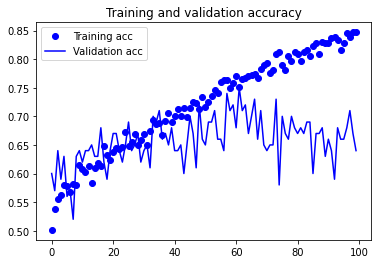

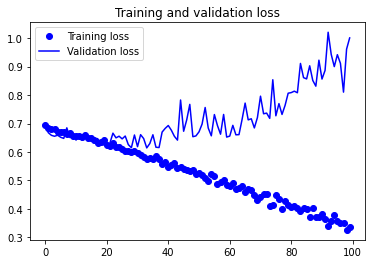

In [ ]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs = range(len(acc5))

plt.plot(epochs, acc5, 'bo', label='Training acc')
plt.plot(epochs, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss5, 'bo', label='Training loss')
plt.plot(epochs, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model5.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 14ms/step - loss: 1.0008 - acc: 0.6400
test acc 0.6399999856948853
